<a href="https://colab.research.google.com/github/havaledar/ECON3740/blob/main/W24_ECON3740_Lab_4_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\large{Assignment 1 - Question 3}
$$

* Adding an image.

* Multiplying salary column
```python
# Convert the 'salary' column to a larger integer type
CEOSAL['salary'] = CEOSAL['salary'].astype('int64')
# Multiply the 'salary' column by 1000
CEOSAL['newsal'] = CEOSAL['salary'] * 1000
```

## Libraries

In [1]:
# Installing Libraries
!pip install stargazer
!pip install gdown==v4.6.3

# Importing Libraries
import pandas as pd
import numpy as np
from stargazer.stargazer import Stargazer
import gdown
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


#Reading data

In [2]:
url = 'https://drive.google.com/file/d/1FAfkh6Pr6J3CRCLs8ql8QMCa1309fcEU/view?usp=drive_link'
output_filename = 'ceosal.dta'
gdown.download(url, output_filename, fuzzy=True ,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1FAfkh6Pr6J3CRCLs8ql8QMCa1309fcEU
To: /content/ceosal.dta
100%|██████████| 13.9k/13.9k [00:00<00:00, 23.9MB/s]


'ceosal.dta'

In [3]:
CEOSAL = pd.read_stata('/content/ceosal.dta')

In [4]:
CEOSAL = CEOSAL[CEOSAL['age'] <= 55]

In [5]:
CEOSAL.shape

(75, 13)

# Question 2

In [6]:
CEOSAL['salary'].info()

<class 'pandas.core.series.Series'>
Int64Index: 75 entries, 0 to 167
Series name: salary
Non-Null Count  Dtype
--------------  -----
75 non-null     int16
dtypes: int16(1)
memory usage: 750.0 bytes


In [7]:
# Convert the 'salary' column to a larger integer type
CEOSAL['salary'] = CEOSAL['salary'].astype('int64')

# Multiply the 'salary' column by 1000
CEOSAL['newsal'] = CEOSAL['salary'] * 1000

CEOSAL['newsal']

0      1161000
1       600000
2       379000
3       651000
4       497000
        ...   
162    1268000
164     693000
165     369000
166     381000
167     467000
Name: newsal, Length: 75, dtype: int64

# Plot with regression line

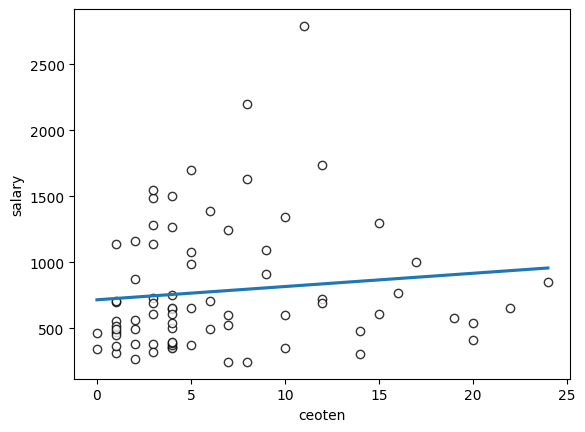

In [10]:
sns.regplot(x='ceoten',
            y='salary',
            data=CEOSAL,
            ci=None,
            scatter_kws={'facecolors':'white',
                         'edgecolors':'black'})

plt.show()

# Xbar & Ybar

In [13]:
CEOSAL['Xbar'] = CEOSAL['ceoten'].mean()
CEOSAL['Ybar'] = CEOSAL['salary'].mean()

In [14]:
CEOSAL['Ybar'].describe()

count     75.000000
mean     781.266667
std        0.000000
min      781.266667
25%      781.266667
50%      781.266667
75%      781.266667
max      781.266667
Name: Ybar, dtype: float64

# XX_YY

$\color{red}{\text{Add 1 parenthesis}}$

In [19]:
CEOSAL

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,comtensq,ceotensq,profmarg,nsal,newsal,Xbar,Ybar,XX_YY
0,1161,49,1,1,9,2,6200.0,966,23200.0,81,4,15.580646,1161000.0,1161000,6.493333,781.266667,24150.133333
1,600,43,1,1,10,10,283.0,48,1100.0,100,100,16.961130,600000.0,600000,6.493333,781.266667,24150.133333
2,379,51,1,1,9,3,169.0,40,1100.0,81,9,23.668638,379000.0,379000,6.493333,781.266667,24150.133333
3,651,55,1,0,22,22,1100.0,-54,1000.0,484,484,-4.909091,651000.0,651000,6.493333,781.266667,24150.133333
4,497,44,1,1,8,6,351.0,28,387.0,64,36,7.977208,497000.0,497000,6.493333,781.266667,24150.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1268,47,1,0,20,4,1100.0,47,2500.0,400,16,4.272727,1268000.0,1268000,6.493333,781.266667,24150.133333
164,693,46,1,1,7,3,2200.0,44,533.0,49,9,2.000000,693000.0,693000,6.493333,781.266667,24150.133333
165,369,49,1,1,4,1,65.0,-132,1200.0,16,1,-203.076920,369000.0,369000,6.493333,781.266667,24150.133333
166,381,54,1,0,30,2,2700.0,386,4500.0,900,4,14.296296,381000.0,381000,6.493333,781.266667,24150.133333


In [18]:
CEOSAL['XX_YY'] = ((CEOSAL['ceoten'] - CEOSAL['Xbar']) * (CEOSAL['salary'] - CEOSAL['Ybar'])).sum()

print('XX_YY: ', '\n', CEOSAL['XX_YY'].describe())

XX_YY:  
 count    7.500000e+01
mean     2.415013e+04
std      3.662477e-12
min      2.415013e+04
25%      2.415013e+04
50%      2.415013e+04
75%      2.415013e+04
max      2.415013e+04
Name: XX_YY, dtype: float64


# XX2

In [20]:
CEOSAL['XX2'] = ((CEOSAL['ceoten'] - CEOSAL['Xbar'])**2).sum()
print('XX2: ', '\n', CEOSAL['XX2'].describe())

XX2:  
 count      75.000000
mean     2404.746667
std         0.000000
min      2404.746667
25%      2404.746667
50%      2404.746667
75%      2404.746667
max      2404.746667
Name: XX2, dtype: float64


In [21]:
CEOSAL

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,comtensq,ceotensq,profmarg,nsal,newsal,Xbar,Ybar,XX_YY,XX2
0,1161,49,1,1,9,2,6200.0,966,23200.0,81,4,15.580646,1161000.0,1161000,6.493333,781.266667,24150.133333,2404.746667
1,600,43,1,1,10,10,283.0,48,1100.0,100,100,16.961130,600000.0,600000,6.493333,781.266667,24150.133333,2404.746667
2,379,51,1,1,9,3,169.0,40,1100.0,81,9,23.668638,379000.0,379000,6.493333,781.266667,24150.133333,2404.746667
3,651,55,1,0,22,22,1100.0,-54,1000.0,484,484,-4.909091,651000.0,651000,6.493333,781.266667,24150.133333,2404.746667
4,497,44,1,1,8,6,351.0,28,387.0,64,36,7.977208,497000.0,497000,6.493333,781.266667,24150.133333,2404.746667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1268,47,1,0,20,4,1100.0,47,2500.0,400,16,4.272727,1268000.0,1268000,6.493333,781.266667,24150.133333,2404.746667
164,693,46,1,1,7,3,2200.0,44,533.0,49,9,2.000000,693000.0,693000,6.493333,781.266667,24150.133333,2404.746667
165,369,49,1,1,4,1,65.0,-132,1200.0,16,1,-203.076920,369000.0,369000,6.493333,781.266667,24150.133333,2404.746667
166,381,54,1,0,30,2,2700.0,386,4500.0,900,4,14.296296,381000.0,381000,6.493333,781.266667,24150.133333,2404.746667


# b1

In [22]:
CEOSAL['b1'] = CEOSAL['XX_YY']/CEOSAL['XX2']
CEOSAL['b1'].describe()

count    7.500000e+01
mean     1.004269e+01
std      1.788319e-15
min      1.004269e+01
25%      1.004269e+01
50%      1.004269e+01
75%      1.004269e+01
max      1.004269e+01
Name: b1, dtype: float64

In [24]:
CEOSAL['b1']

0      10.042693
1      10.042693
2      10.042693
3      10.042693
4      10.042693
         ...    
162    10.042693
164    10.042693
165    10.042693
166    10.042693
167    10.042693
Name: b1, Length: 75, dtype: float64

# b0

In [25]:
CEOSAL['b0'] = CEOSAL['Ybar']-CEOSAL['b1'] * CEOSAL['Xbar']
CEOSAL['b0'].describe()

count    7.500000e+01
mean     7.160561e+02
std      1.144524e-13
min      7.160561e+02
25%      7.160561e+02
50%      7.160561e+02
75%      7.160561e+02
max      7.160561e+02
Name: b0, dtype: float64

# yhat

In [26]:
CEOSAL['yhat'] = CEOSAL['b0'] + CEOSAL['b1'] * CEOSAL['ceoten']
CEOSAL['yhat']

0      736.141498
1      816.483045
2      746.184191
3      936.995365
4      776.312271
          ...    
162    756.226885
164    746.184191
165    726.098805
166    736.141498
167    716.056111
Name: yhat, Length: 75, dtype: float64

# yhat plot

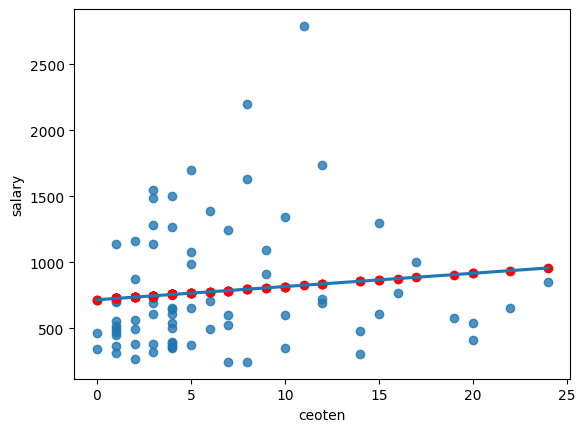

In [27]:
sns.regplot(x='ceoten',
            y='salary',
            data=CEOSAL,
            ci=None)

plt.scatter(CEOSAL['ceoten'],
            CEOSAL['yhat'],
            color='red',
            label='Red Dots')

plt.show()

# uhat

In [28]:
CEOSAL['uhat'] = CEOSAL['salary'] - CEOSAL['yhat']

CEOSAL['uhat'].describe()

count    7.500000e+01
mean     6.063298e-15
std      4.813403e+02
min     -5.503977e+02
25%     -3.561202e+02
50%     -1.512269e+02
75%      2.536450e+02
max      1.965474e+03
Name: uhat, dtype: float64

# Regression equation

$$
\hat{\text{salary}} = 716.05 + 10.04 \cdot \text{ceoten} \\
\hspace{1pt} (85.14) \hspace{10pt} (9.88)
$$